Trabalho probabilidade e estatística

Análise Estatística de Padrões de Saúde: Avaliando atividade física, sono e ritmo calórico com dados de wearables  

Carregar os dados do kaggle:

In [ ]:
!pip install kagglehub[pandas-datasets]

In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("arashnic/fitbit")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'fitbit' dataset.
Path to dataset files: /kaggle/input/fitbit


Importar os arquivos csv, cria os Dataframes e trata os dados:

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

basePath = '/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/'

# cria os dataframes

calorias = pd.read_csv(basePath + 'dailyCalories_merged.csv')
passosDiarios = pd.read_csv(basePath + 'dailySteps_merged.csv')
tipoSonoHorario = pd.read_csv(basePath + 'minuteSleep_merged.csv')

# converte datas para dateTIme

calorias["ActivityDay"] = pd.to_datetime(calorias["ActivityDay"])
passosDiarios["ActivityDay"] = pd.to_datetime(passosDiarios["ActivityDay"])
tipoSonoHorario["date"] = pd.to_datetime(tipoSonoHorario["date"])

# junta os dois data frames por Id e data

df_calPassos = pd.merge(calorias, passosDiarios, on=["Id", "ActivityDay"])

# Tira duplicatas e NaN

df_calPassos = df_calPassos.drop_duplicates(subset=["Id", "ActivityDay"])
df_calPassos = df_calPassos.dropna()

Gráfico de dispersão de Calorias x Passos

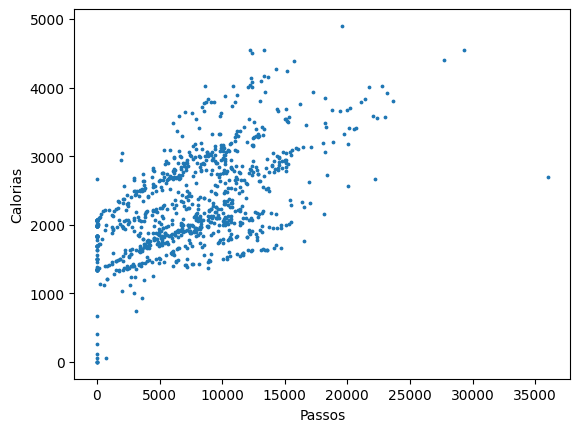

In [41]:
# cria gráfico de dispersão calorias x passos

df_calPassos.plot(kind="scatter", x="StepTotal", y="Calories", s=3)

plt.xlabel("Passos")
plt.ylabel("Calorias")
plt.show()

Distribuição de tipo de sono por horário

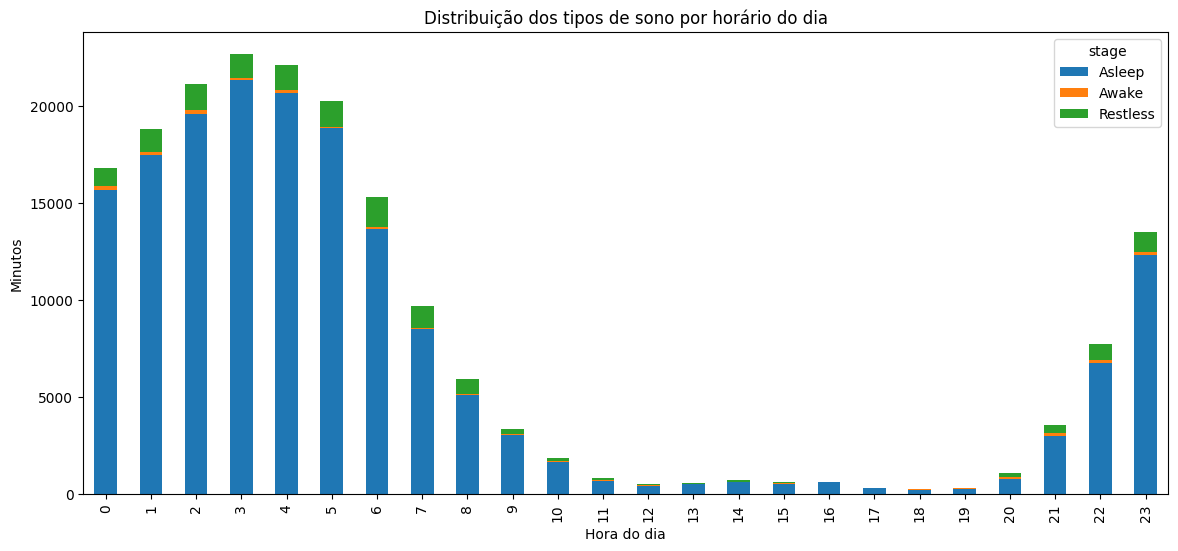

In [46]:
sleep_map = {
    1: "Asleep",
    2: "Restless",
    3: "Awake"
}
tipoSonoHorario["datetime"] = pd.to_datetime(tipoSonoHorario["date"])
tipoSonoHorario["stage"] = tipoSonoHorario["value"].map(sleep_map)
tipoSonoHorario["hour"] = tipoSonoHorario["datetime"].dt.hour

grouped = tipoSonoHorario.groupby(["hour", "stage"]).size().reset_index(name="minutes")
grouped.head()

pivot = grouped.pivot(index="hour", columns="stage", values="minutes").fillna(0)

pivot.plot(kind="bar", stacked=True, figsize=(14,6))
plt.xlabel("Hora do dia")
plt.ylabel("Minutos")
plt.title("Distribuição dos tipos de sono por horário do dia")
plt.show()

# tipoSonoHorario.plot(kind='hist', x='date', y='value')

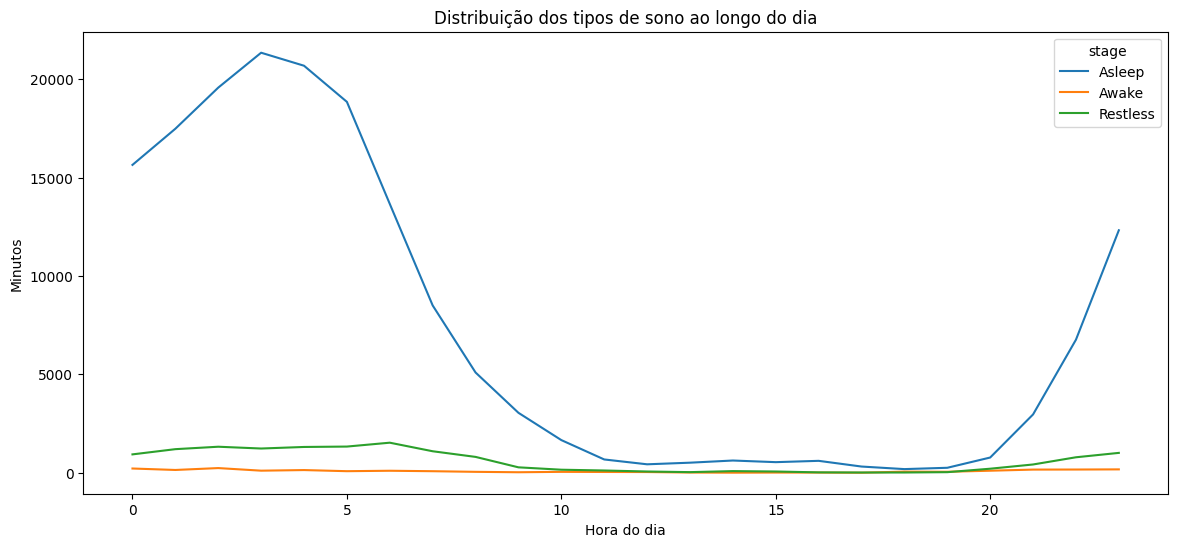

In [47]:
pivot.plot(figsize=(14,6))
plt.xlabel("Hora do dia")
plt.ylabel("Minutos")
plt.title("Distribuição dos tipos de sono ao longo do dia")
plt.show()